# BANK CUSTOMER CHURN MODEL

## OBJECTIVE

### DATA ENCODING

### FEATURE SCALING

### HANDLING IMBALANCED DATA
 - RANDOM UNDER SAMPLING
 - RANDOM OVER SAMPLING

### SUPPORT VECTOR MACHINE CLASSIFIER

### GRID SEARCH FOR HYPERPARAMETER TUNING

### IMPORT LIBRARIES

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [530]:
df=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv")

In [531]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [533]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [534]:
df.shape

(10000, 13)

In [535]:
df.duplicated("CustomerId").sum()

0

In [536]:
df=df.set_index("CustomerId")

In [537]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


## ENCODING

In [539]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [540]:
df.replace({"Geography":{"France":2,"Germany":1,"Spain":0}},inplace=True)

In [541]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [542]:
df.replace({"Gender":{"Male":0,"Female":1}},inplace=True)

In [543]:
df["Num Of Products"].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

Since product 3,4 are very less in number so we can club them into one and encode as same

In [552]:
df.replace({"Num of Products":{1:0,2:1,3:1,4:1}},inplace=True)

In [559]:
df["Has Credit Card"].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [586]:
df["Is Active Member"].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

## FEATURE ENGINEERING

In [589]:
df.loc[(df["Balance"]==0),"Churn"].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

find the churn value of only those customers whose balance is 0

1-500- left the bank
0-3117- Still with Bank

In [592]:
df["Zero Balance"]=np.where(df["Balance"]>0,1,0)

In [594]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Zero Balance
CustomerId,,,,,,,,,,,,,
15634602,Hargrave,619,2,1,42,2,0.00,1,1,1,101348.88,1,0
15647311,Hill,608,0,1,41,1,83807.86,1,0,1,112542.58,0,1
15619304,Onio,502,2,1,42,8,159660.80,3,1,0,113931.57,1,1
15701354,Boni,699,2,1,39,1,0.00,2,0,0,93826.63,0,0
15737888,Mitchell,850,0,1,43,2,125510.82,1,1,1,79084.10,0,1


<Axes: >

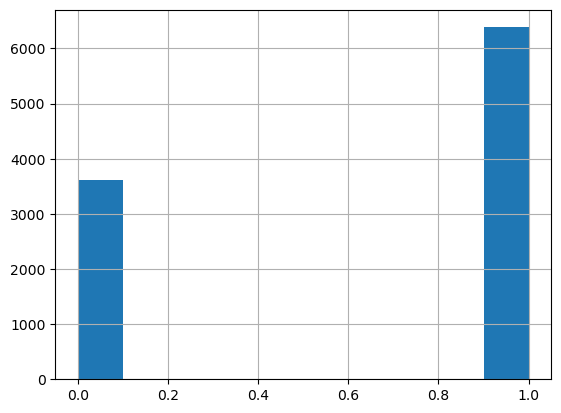

In [596]:
df["Zero Balance"].hist()

no of people with zero balance is about 3600

In [599]:
df.groupby(["Churn","Geography"]).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

# MODEL IMPLEMENTAION

In [602]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [604]:
X=df.drop(["Surname","Churn"],axis=1)

In [582]:
y=df["Churn"]

In [584]:
X.shape,y.shape

((10000, 11), (10000,))

## HANDLING IMBALANCED DATA

A classification data set with skewed class proportions is called imbalanced. Classes that make up a large proportion of the data set are called majority classes. Those that make up a smaller proportion are minority classes.

With so few positives relative to negatives, the training model will spend most of its time on negative examples and not learn enough from positive ones. For example, if your batch size is 128, many batches will have no positive examples, so the gradients will be less informative.

An effective way to handle imbalanced data is to downsample and upweight the majority class. Let's start by defining those two new terms:

Downsampling (in this context) means training on a disproportionately low subset of the majority class example

s.
Upweighting means adding an example weight to the downsampled class equal to the factor by which you downsampled.

### Oversampling: in oversampling, you artificially increase the number of instances in the minority class. This can be done either by duplicating existing minority class samples or by generating synthetic data points that resemble the minority class (i.e. SMOTE).

### Undersampling: it involves reducing the number of instances in the majority class. This can be achieved either by randomly removing samples from the majority class or by using more advanced methods that intelligently select which samples to keep (i.e. Tomek Links).

In [612]:
df["Churn"].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

### 1 means left the bank

<Axes: xlabel='Churn', ylabel='count'>

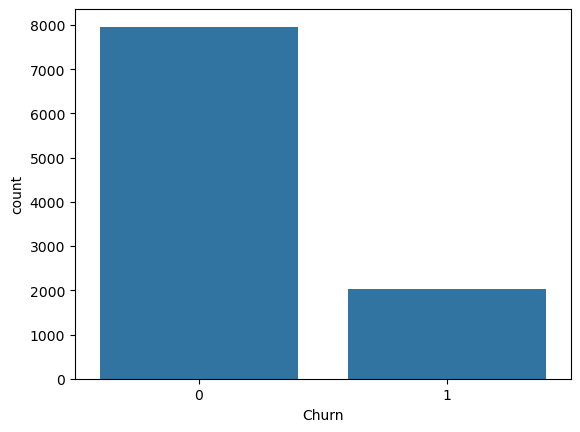

In [615]:
sns.countplot(x="Churn",data=df)

### FIXING IMBALANCE= RANDOM UNDER SAMPING

In [618]:
from imblearn.under_sampling import RandomUnderSampler

In [620]:
rus=RandomUnderSampler(random_state=2529)

In [622]:
X_rus,y_rus=rus.fit_resample(X,y)

In [624]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [626]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

#### next cell notice

In [629]:
X_rus.shape,y_rus.shape,X.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

<Axes: ylabel='Frequency'>

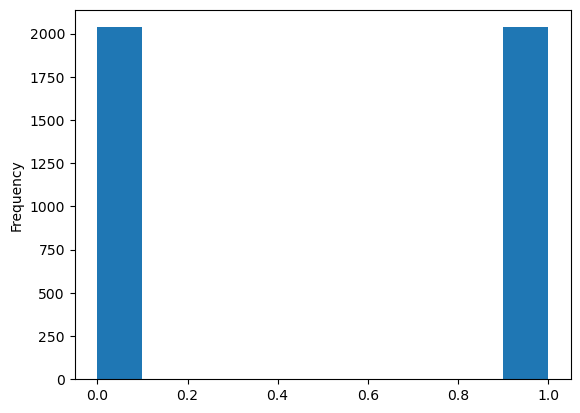

In [631]:
y_rus.plot(kind="hist")

NOW THEY ARE EQUAL

### FIXING IMBALANCE= RANDOM OVER SAMPING

In [635]:
from imblearn.over_sampling import RandomOverSampler

In [637]:
ros=RandomOverSampler(random_state=2529)

In [639]:
X_ros,y_ros=ros.fit_resample(X,y)

In [641]:
X_ros.shape,y_ros.shape,X.shape,y.shape  # dataset becomes bigger

((15926, 11), (15926,), (10000, 11), (10000,))

notice the increase

<Axes: ylabel='Frequency'>

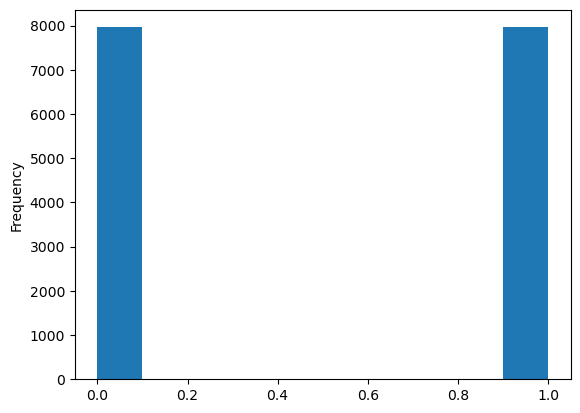

In [644]:
y_ros.plot(kind="hist")

In [645]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [648]:
y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

this is better than underfitting as we are not losing any information

# TRAIN TEST SPLIT

In [652]:
from sklearn.model_selection import train_test_split

## SPLIT ORIGINAL DATA

In [655]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=2529)

## RANDOM UNDERSAMPLING DATA SPLIT

In [658]:
X_train_rus,X_test_rus,y_train_rus,y_test_rus=train_test_split(X_rus,y_rus,train_size=0.7,random_state=2529)

## RANDOM OVERSAMPLING DATA SPLIT

In [663]:
X_train_ros,X_test_ros,y_train_ros,y_test_ros=train_test_split(X_ros,y_ros,train_size=0.7,random_state=2529)

# STANDARDIZE FEATURES

It is done so because all our x values/features are in different scalee(ex-age,tenure,etc)  ONLY NUMERICAL FEATURES (NOT CATEGORICAL)

In [667]:
from sklearn.preprocessing import StandardScaler

In [669]:
sc=StandardScaler()

## standardize original data

In [672]:
X_train[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']] )
X_test[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']] )

## standardize random undersampled data 

In [675]:
X_train_rus[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_rus[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']])
X_test_rus[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test_rus[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']])

## standardize random oversampled data 

In [677]:
X_train_ros[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_ros[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']])
X_test_ros[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test_ros[['CreditScore', 'Age', 'Tenure','Balance','Estimated Salary']])

# SUPPORT VECTOR MACHINE CLASSIFIER

In [680]:
from sklearn.svm import SVC

In [682]:
svc=SVC()

In [684]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance
CustomerId,,,,,,,,,,,
15771139,-0.739978,1,0,-0.471292,1.030078,1.133658,2,1,0,-0.574243,1
15713463,-0.052604,1,1,0.197033,-1.037956,0.995601,1,1,0,0.523846,1
15570417,-0.729719,2,0,-0.375817,-1.382628,-1.232271,2,1,0,-1.654363,0
15626243,-0.329605,2,0,-0.853193,-0.693284,0.914802,1,1,1,-1.186580,1
15809178,-0.832312,1,1,0.292508,1.374750,1.111417,1,1,0,-1.166320,1
...,...,...,...,...,...,...,...,...,...,...,...
15723028,1.311885,2,0,-0.566767,-1.382628,-1.232271,2,1,0,-0.248597,0
15759284,1.024624,2,1,-0.184867,0.340733,-1.232271,1,1,1,0.315731,0
15796218,1.681220,1,0,-0.948668,-1.382628,0.884714,2,1,1,0.832106,1


In [686]:
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Zero Balance
CustomerId,,,,,,,,,,,
15648064,-0.026035,2,0,-0.559788,-1.050775,-1.211041,2,1,0,-1.725971,0
15765014,-1.103218,2,1,0.866302,-1.399175,1.658196,2,0,1,-0.551707,1
15588670,0.565359,0,1,0.105721,-0.005574,2.047430,1,1,0,1.381457,1
15595047,1.188435,2,0,0.200793,0.691226,-1.211041,2,0,0,0.593977,0
15659175,1.093389,2,1,0.390939,1.388026,-1.211041,2,1,0,-1.445628,0
...,...,...,...,...,...,...,...,...,...,...,...
15736124,-0.363975,2,0,-1.320369,-1.399175,0.429844,2,1,1,0.253653,1
15728838,-0.775839,2,0,0.581084,-1.399175,1.165865,1,1,0,0.742721,1
15661734,-0.459021,1,0,0.295866,1.039626,0.890584,2,1,0,-0.518270,1


In [688]:
y_train

CustomerId
15771139    0
15713463    1
15570417    0
15626243    0
15809178    1
           ..
15723028    0
15759284    1
15796218    0
15585284    0
15593622    0
Name: Churn, Length: 7000, dtype: int64

In [690]:
y_test

CustomerId
15648064    0
15765014    0
15588670    1
15595047    0
15659175    0
           ..
15736124    0
15728838    1
15661734    0
15699532    0
15568106    0
Name: Churn, Length: 3000, dtype: int64

In [692]:
svc.fit(X_train,y_train)

SVC()

In [694]:
y_pred=svc.predict(X_test)

In [696]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# MODELS ACCURACY

In [699]:
from sklearn.metrics import confusion_matrix,classification_report

## RAW DATASET

In [704]:
confusion_matrix(y_test,y_pred)

array([[2380,   34],
       [ 410,  176]], dtype=int64)

In [706]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.84      0.30      0.44       586

    accuracy                           0.85      3000
   macro avg       0.85      0.64      0.68      3000
weighted avg       0.85      0.85      0.82      3000



Our category of interest is who all are churning/leaving the bank(1)

the recall value is very high of 30 percent,although recall value of 0.85 is very high,suggesting model is biased .

it means the recall of category of interest in only 30%

it happens so because data is imbalanced and poeple leaving /churn (1) is very less as compared to people who didnt(0)

# HYPERPARAMETER TUNING

tuning the raw data set so as to not have to balance the data

In [750]:
from sklearn.model_selection import GridSearchCV

In [752]:
param_grid={"C":[0.1,1,10],
            "gamma":[1,0.1,0.01],
            "kernel":["rbf"],
            "class_weight":["balanced"]}

In [760]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.8s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [766]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [770]:
grid_predictions=grid.predict(X_test)

In [776]:
confusion_matrix(y_test,grid_predictions)

array([[2121,  293],
       [ 273,  313]], dtype=int64)

In [779]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2414
           1       0.52      0.53      0.53       586

    accuracy                           0.81      3000
   macro avg       0.70      0.71      0.70      3000
weighted avg       0.81      0.81      0.81      3000



accuracy fell to 81 percent,but model prediction got better to 53%

# MODEL BALANCED and HYPERPARAMETER TUNING

## SVM ON RANDOM UNDER SAMPLING

In [784]:
svc.fit(X_train_rus,y_train_rus)

SVC()

In [785]:
y_pred_rus=svc.predict(X_test_rus)

In [787]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[487, 140],
       [180, 416]], dtype=int64)

In [795]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       627
           1       0.75      0.70      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



accuracy is less than raw,but prediction is better

In [838]:
param_grid={"C":[0.1,1,10],
            "gamma":[1,0.1,0.01],
            "kernel":["rbf"],
            "class_weight":["balanced"]}

In [840]:
grid_rus=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_rus.fit(X_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [842]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [850]:
grid_predictions_rus=grid_rus.predict(X_test_rus)

In [852]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[490, 137],
       [185, 411]], dtype=int64)

In [854]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       627
           1       0.75      0.69      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



## SVM ON RANDOM OVER SAMPLING

In [734]:
svc.fit(X_train_ros,y_train_ros)

SVC()

In [735]:
y_pred_ros=svc.predict(X_test_ros)

In [736]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[1931,  448],
       [ 614, 1785]], dtype=int64)

In [737]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      2379
           1       0.80      0.74      0.77      2399

    accuracy                           0.78      4778
   macro avg       0.78      0.78      0.78      4778
weighted avg       0.78      0.78      0.78      4778



In [836]:
param_grid={"C":[0.1,1,10],
            "gamma":[1,0.1,0.01],
            "kernel":["rbf"],
            "class_weight":["balanced"]}

In [857]:
grid_ros=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_ros.fit(X_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   9.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   6.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.7s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [863]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [865]:
grid_predictions_ros=grid_ros.predict(X_test_ros)

In [866]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2084,  295],
       [  59, 2340]], dtype=int64)

In [871]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      2379
           1       0.89      0.98      0.93      2399

    accuracy                           0.93      4778
   macro avg       0.93      0.93      0.93      4778
weighted avg       0.93      0.93      0.93      4778



hypertuned ROS model gives prediction and accuracy than any other model